In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')


In [2]:
df=pd.read_csv("Resources/Data/movies.csv")
df.tail()

,movie,budge,gross,comment_count,view_count,like_count,year
310,Split,5000000.0,138141585.0,15442,26806693,111273,2017
311,The Bye Bye Man,7400000.0,22395806.0,3562,4997688,18916,2017
312,Monster Trucks,125000000.0,33370166.0,2754,4410280,21090,2017
313,A Monster Calls,43000000.0,3740823.0,5855,8440595,48739,2017
314,Underworld: Blood Wars,35000000.0,30353973.0,1421,5764063,12386,2017


In [3]:
# df["like_count%"]=df["like_count"]/df["view_count"]
# df["comment_count%"]=df["comment_count"]/df["view_count"]
# df["commentoverlike"]=df["comment_count"]/df["like_count"]
df.head()

,movie,budge,gross,comment_count,view_count,like_count,year
0,On the Basis of Sex,20000000.0,24622687.0,2251,8111048,28827,2018
1,Destroyer,9000000.0,1533324.0,95,129496,661,2018
2,Vice,60000000.0,47836282.0,1631,2453119,13255,2018
3,Aquaman,160000000.0,335061807.0,94633,59057688,648092,2018
4,Welcome to Marwen,45000000.0,10763520.0,9197,4773419,69748,2018


In [4]:
df=df[df["gross"]!=0]
df.isnull().sum(axis = 0)
#check nan values

movie            0
budge            0
gross            0
comment_count    0
view_count       0
like_count       0
year             0
dtype: int64

In [5]:
dataset=df.copy()
dataset.head()
X=dataset.iloc[:,[1,3,4,5]]
y=dataset.iloc[:,[2]]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


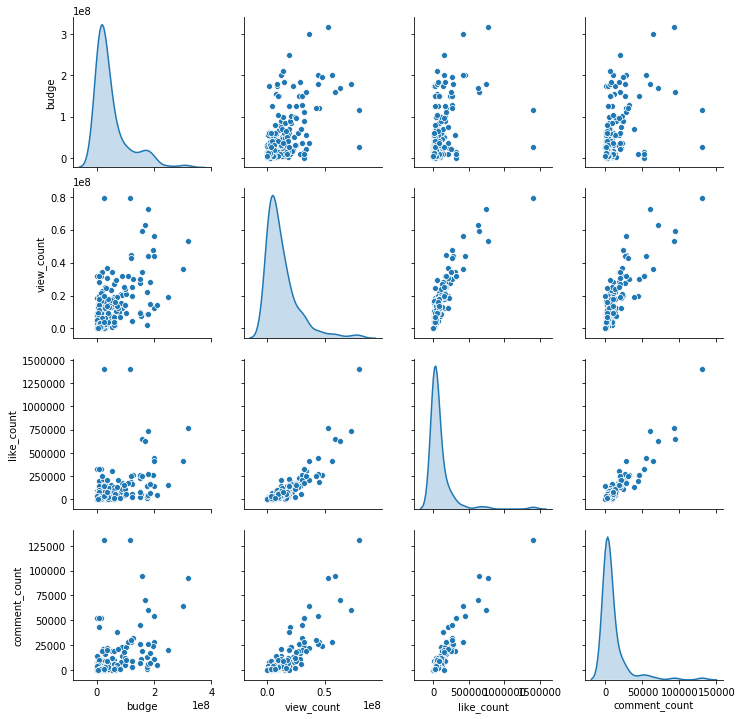

In [6]:
sns.pairplot(X_train[["budge", "view_count", "like_count","comment_count"]], diag_kind="kde")
plt.show()
#check distribution of this dataset

In [7]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats.style.format("{:.3f}")
#check stats for each factor

,count,mean,std,min,25%,50%,75%,max
budge,219.000,50187173.516,58685505.484,250000.000,10000000.000,30000000.000,60000000.000,317000000.000
comment_count,219.000,9761.237,18827.592,0.000,1034.500,3075.000,9182.000,131130.000
view_count,219.000,13044507.018,14198510.839,29862.000,3411226.000,8727865.000,17501703.500,79216032.000
like_count,219.000,88211.982,174174.051,186.000,12049.500,30213.000,82223.000,1404623.000


In [8]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
deep_model = Sequential()
deep_model.add(Dense(units=64, activation='relu', input_dim=4))
deep_model.add(Dense(units=64, activation='relu'))
deep_model.add(Dense(units=1, activation='softmax'))

W0727 23:51:12.969052 15480 deprecation.py:506] From c:\users\yumikee\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
deep_model.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [12]:
deep_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [13]:
k=deep_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 2/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 3/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 4/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 5/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 6/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 7/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 8/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 9/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 10/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 11/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 12/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 13/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 14/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 15/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 16/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 17/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 

Epoch 140/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 141/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 142/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 143/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 144/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 145/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 146/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 147/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 148/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 149/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 150/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 151/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 152/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 153/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 154/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 155/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 156/500
219/219 - 0s - loss: 2.000

Epoch 277/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 278/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 279/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 280/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 281/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 282/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 283/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 284/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 285/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 286/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 287/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 288/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 289/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 290/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 291/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 292/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 293/500
219/219 - 0s - loss: 2.000

Epoch 414/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 415/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 416/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 417/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 418/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 419/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 420/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 421/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 422/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 423/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 424/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 425/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 426/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 427/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 428/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 429/500
219/219 - 0s - loss: 2.0000 - acc: 0.0000e+00
Epoch 430/500
219/219 - 0s - loss: 2.000

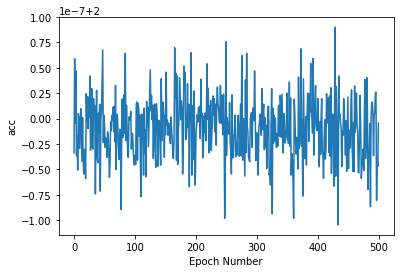

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel("acc")
plt.plot(k.history['loss'])

In [15]:
# def plot_history(history):
#   hist = pd.DataFrame(history.history)
#   hist['epoch'] = history.epoch

#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Abs Error [gross]')
#   plt.plot(hist['epoch'], hist['mean_absolute_error'],
#            label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#            label = 'Val Error')
#   plt.legend()

# plot_history(history)

In [16]:
# model = build_model()

# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# plot_history(history)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_train_scaled, y_train_scaled)


0.9252060543117555

In [18]:
rf.score(X_test_scaled, y_test_scaled)

0.6284211884158348

In [19]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train_scaled.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model